In [1]:
import numpy as np
import argparse
from astropy.table import Table
import os
import astropy.units as u
from astropy.units import cds
from astropy.nddata import StdDevUncertainty
import h5py
from specutils import Spectrum1D
import matplotlib.pyplot as plt
from astropy.io import fits
# from getdataH5 import getdata

In [ ]:
# Command for running one of our spectra through uberMS in TP mode with photometry:
# python runhecto.py -t UTP -pb -ds -dp -o hecto_tp_ds_dp_improved_priors.fits

# ...MS mode
# python runhecto.py -t UMS -pb -ds -dp -o hecto_ms_ds_dp.fits

In [2]:
hecto_dir = os.path.expanduser(r"C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\data")
hecto_filename = os.path.join(hecto_dir,"data_ngc6819_2010.0921_ngc6819_sep2010_1.7137.h5")
f = h5py.File(hecto_filename, 'r')
print(f.keys())
print(type(f))

<KeysViewHDF5 ['2076282234234252672', '2076290991662820992', '2076291133406561536', '2076291270845523584', '2076292370356991872', '2076292915808146688', '2076292954472727808', '2076293435509088640', '2076293603002516224', '2076294809899401216', '2076294844254154752', '2076294981697354752', '2076295187855800960', '2076295320987086080', '2076295806331001856', '2076296081208911616', '2076296489220988416', '2076296493525821440', '2076296562245292800', '2076297107693568384', '2076297283799757184', '2076297799195859072', '2076297867915351040', '2076298177153033344', '2076298310284495232', '2076298486390685440', '2076298555110191616', '2076298658189443840', '2076298761264704640', '2076298898707574016', '2076298967427093248', '2076299070506210048', '2076299203645002752', '2076299512875311872', '2076299517182833152', '2076299620262070400', '2076299723341299840', '2076299723341308288', '2076299753393404160', '2076299826420533248', '2076299963859456000', '2076299993911658368', '207630006693871923

In [4]:
target = str(2076392838230907392)

print(f[target].keys())
print(f[target]['phot'].keys())
print(f[target]['phot']['2MASS_J'])

# print magnitude errors
for filt in f[target]['phot']:
    print(filt, f[target]['phot'][filt][1])

<KeysViewHDF5 ['eflux', 'flux', 'flux_raw', 'ivar_raw', 'mask_raw', 'phot', 'wave', 'wave_raw']>
<KeysViewHDF5 ['2MASS_H', '2MASS_J', '2MASS_Ks', 'GaiaEDR3_BP', 'GaiaEDR3_G', 'GaiaEDR3_RP', 'PS_g', 'PS_i', 'PS_r', 'PS_y', 'PS_z']>
<HDF5 dataset "2MASS_J": shape (2,), type "<f8">
2MASS_H 0.08683893326204858
2MASS_J 0.07733692547677395
2MASS_Ks 0.10121264701645077
GaiaEDR3_BP 0.05004763662644478
GaiaEDR3_G 0.05000091916311386
GaiaEDR3_RP 0.050012894094444295
PS_g 0.020829461749839007
PS_i 0.020870045165005097
PS_r 0.02065512096136038
PS_y 0.020410418413162563
PS_z 0.020915354323712318


In [29]:
# output wavelengths to csv
waves = np.array(f[target]['wave'])
np.savetxt('obs_wave.csv', [waves], delimiter=',\n', header='wave')

In [2]:
hecto_dir = os.path.expanduser(r"G:\Shared drives\DouglasGroup\data\MMT Hectochelle\Reduced Spectra")
hecto_filename = os.path.join(hecto_dir,"data_ngc6811_2019.0516_hectochelle_NGC6811_2019b_1.8149.h5")
f = h5py.File(hecto_filename, 'r')
print(f.keys())
print(type(f))

<KeysViewHDF5 ['2080061393129929088', '2080062973677923840', '2080063763947694976', '2080064653004009088', '2080085582385980288', '2080087162933787008', '2080087643970202624', '2080088331164882560', '2080089396316882688', '2080089598179046016', '2080090255310324736', '2080090289670075264', '2080090427109053568', '2080091492261057408', '2080093210247977600', '2080097058538601088', '2080097191676689536', '2080097260396182016', '2080098123690634112', '2080098845245174528', '2080099154482771200', '2080475909013845888', '2128018890577388672', '2128020922102070400', '2128067445187794816', '2128067823144933376', '2128093592947472512', '2128095104776005248', '2128095723251310464', '2128097441238130432', '2128097750468944512', '2128099983858866816', '2128101182149575808', '2128101976725587072', '2128102114162692224', '2128102492119815168', '2128102801357490048', '2128102938796435712', '2128103243733956224', '2128104141387274240', '2128105000380699136', '2128105584489662720', '212810647784944537

### **This works for running uberMS in UTP**

In [16]:
# Target is the string of the target Gaia DR3 ID
target = str(2080061393129929088)

# Create table with photometry for every filter
phottab = f[target]['phot']

# Get the filters
filtarr = phottab.keys()
print(filtarr)

# Create a list of the filters
# phot_keys = [key for key in filtarr]
# print(phot_keys)

phot = {}
# Create a dict with {filter name: [flux magnitude, flux error]}
for i, filter in enumerate(filtarr):

    # Skip the PS_y filter because the NN is not trained on it
    if filter != 'PS_y':
        phot[filter] = [float(phottab[filter][0]),float(phottab[filter][1])]
    else:
        print('Skipping {filter} filter')
# print(phot)

phot['GaiaDR3_BP'] = phot.pop('GaiaEDR3_BP')
phot['GaiaDR3_RP'] = phot.pop('GaiaEDR3_RP')
phot['GaiaDR3_G'] = phot.pop('GaiaEDR3_G')

filtarr = list(phot.keys())
print(filtarr)


print(phot.keys())

<KeysViewHDF5 ['2MASS_H', '2MASS_J', '2MASS_Ks', 'GaiaEDR3_BP', 'GaiaEDR3_G', 'GaiaEDR3_RP', 'PS_g', 'PS_i', 'PS_r', 'PS_y', 'PS_z', 'WISE_W1', 'WISE_W2']>
Skipping {filter} filter
['2MASS_H', '2MASS_J', '2MASS_Ks', 'PS_g', 'PS_i', 'PS_r', 'PS_z', 'WISE_W1', 'WISE_W2', 'GaiaDR3_BP', 'GaiaDR3_RP', 'GaiaDR3_G']
dict_keys(['2MASS_H', '2MASS_J', '2MASS_Ks', 'PS_g', 'PS_i', 'PS_r', 'PS_z', 'WISE_W1', 'WISE_W2', 'GaiaDR3_BP', 'GaiaDR3_RP', 'GaiaDR3_G'])


In [3]:
demophot_dir = os.path.expanduser(r"C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\demospec_18Sco.fits")
# demophot = fits.getheader(demophot_dir)

phottab = Table.read(demophot_dir, format='fits')
print(phottab)

# filtarr = ['GaiaDR3_G','GaiaDR3_BP','GaiaDR3_RP','2MASS_J','2MASS_H','2MASS_Ks','WISE_W1','WISE_W2']
# phot = {}
# for ii,pb in enumerate(filtarr):
#     phot[pb] = [float(phottab['mag'][ii]), float(phottab['err'][ii])]

# print(phot)

       wave               flux                 err         
------------------ ------------------ ---------------------
 5143.572207933707 0.9618665027946625  0.002412398407263862
  5143.67925856682 0.8898642584687477 0.0023271255826874454
5143.7863110438975 0.9015520663580598  0.002340774520913577
 5143.893365351078  0.966150578460005  0.002417976775967927
 5144.000421474493 0.9843699571431063    0.0024373935209614
 5144.107479400274 0.9943425750004647 0.0024524017864910683
 5144.214539114539 0.9981864530254174  0.002457016135469833
   5144.3216006034 0.9853511288005427 0.0024420532959797212
 5144.428663852964 0.9692591567489814 0.0024225617639575653
  5144.53572884933 0.9255580457540149 0.0023694980407007286
               ...                ...                   ...
 5300.329978563882 0.9816272618232692 0.0028400810043077646
 5300.422908347827 0.9741948137608183  0.002831783093639956
 5300.515819364195 0.9782492968313686 0.0028390188518859732
 5300.608711605417 0.9236936468674258 0.

In [17]:
with fits.open(demophot_dir) as hdu_list:
    print(hdu_list[1].header)
    print(hdu_list[1].data['flux'])

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   24 / length of dimension 1                          NAXIS2  =                 1536 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    3 / number of table fields                         TTYPE1  = 'wave    '                                                            TFORM1  = 'D       '                                                            TTYPE2  = 'flux    '                                                            TFORM2  = 'D       '                                                            TTYPE3  = 'err     '                    

In [8]:
star_data = f['2080061393129929088']
print(star_data.keys())

print(star_data['flux'])
print(star_data['flux'][:3])

<KeysViewHDF5 ['eflux', 'flux', 'flux_raw', 'ivar_raw', 'mask_raw', 'phot', 'wave', 'wave_raw']>
<HDF5 dataset "flux": shape (3739,), type "<f8">
[0.88449419 0.82122054 0.82058264]


In [34]:
print(star_data['flux'])
print(star_data['eflux'])
print(star_data['wave'])

print(star_data['phot'])

<HDF5 dataset "flux": shape (3739,), type "<f8">
<HDF5 dataset "eflux": shape (3739,), type "<f8">
<HDF5 dataset "wave": shape (3739,), type ">f8">
<HDF5 group "/2080061393129929088/phot" (13 members)>


In [31]:
spec = Table([star_data['wave'], star_data['flux'], star_data['eflux']], names=('wave', 'flux', 'err'))
print(spec['wave'].max(), spec['wave'].min())
print(len(spec[(spec['wave'] > 5150) & (spec['wave'] < 5300)]), len(spec))

5289.998419890931 5160.0200104603355
3739 3739


In [24]:
target = str(2080061393129929088)
wav = f[target]["wave"] * u.AA
flu = f[target]["flux"] * u.Jy
err = StdDevUncertainty(f[target]["eflux"]*u.Jy)

# So when you print spec[i], you get the ith row of the table
spec = Spectrum1D(spectral_axis=wav, flux=flu, uncertainty=err)

print(spec.wavelength)

[5160.02001046 5160.05606708 5160.09212375 ... 5289.93401566 5289.96621873
 5289.99841989] Angstrom


In [26]:
with fits.open('demospec_18Sco.fits') as hdul:
    hdul.info()
    spec = Table.read('./demospec_18Sco.fits', format='fits')

print(spec)

Filename: demospec_18Sco.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     14   1536R x 3C   [D, D, D]   
       wave               flux                 err         
------------------ ------------------ ---------------------
 5143.572207933707 0.9618665027946625  0.002412398407263862
  5143.67925856682 0.8898642584687477 0.0023271255826874454
5143.7863110438975 0.9015520663580598  0.002340774520913577
 5143.893365351078  0.966150578460005  0.002417976775967927
 5144.000421474493 0.9843699571431063    0.0024373935209614
 5144.107479400274 0.9943425750004647 0.0024524017864910683
 5144.214539114539 0.9981864530254174  0.002457016135469833
   5144.3216006034 0.9853511288005427 0.0024420532959797212
 5144.428663852964 0.9692591567489814 0.0024225617639575653
  5144.53572884933 0.9255580457540149 0.0023694980407007286
               ...                ...                   ...
 5300.329

In [6]:
spec = spec[(spec['wave'] > 5150.0) & (spec['wave'] < 5300.0)]
print(spec)

NameError: name 'spec' is not defined

In [12]:
spectrum = Table.read(hecto_filename, format='hdf5')
print(type(spectrum))
print(spectrum.colnames)

# Columns wanted: wave, flux, fluxerr

<class 'astropy.table.table.Table'>
['H3_ID', 'PS_ID', 'TMASS_ID', 'WISE_ID', 'UNWISE_ID', 'SDSS_ID', 'GALEX_ID', 'DES_ID', 'DECAPS_ID', 'UKIDSS_ID', 'APOPAYNE_ID', 'LAMOST_ID', 'GAIADR1_ID', 'GAIADR2_ID', 'GAIAEDR3_ID', 'TILE_ID', 'RA', 'DEC', 'RA_S', 'DEC_S', 'L', 'B', 'EBV', 'BHB', 'MGIANT', 'RAND', 'GUIDE', 'XFIT_RANK', 'PS_G', 'PS_R', 'PS_I', 'PS_Z', 'PS_Y', 'SDSS_U', 'SDSS_G', 'SDSS_R', 'SDSS_I', 'SDSS_Z', 'TMASS_J', 'TMASS_H', 'TMASS_K', 'WISE_W1', 'WISE_W2', 'WISE_W3', 'WISE_W4', 'UNWISE_W1', 'UNWISE_W2', 'GALEX_NUV', 'GALEX_FUV', 'DES_G', 'DES_R', 'DES_I', 'DES_Z', 'DES_Y', 'DECAPS_G', 'DECAPS_R', 'DECAPS_I', 'DECAPS_Z', 'DECAPS_Y', 'UKIDSS_J', 'UKIDSS_H', 'UKIDSS_K', 'GAIADR2_G', 'GAIADR2_BP', 'GAIADR2_RP', 'GAIAEDR3_G', 'GAIAEDR3_BP', 'GAIAEDR3_RP', 'PS_G_ERR', 'PS_R_ERR', 'PS_I_ERR', 'PS_Z_ERR', 'PS_Y_ERR', 'SDSS_U_ERR', 'SDSS_G_ERR', 'SDSS_R_ERR', 'SDSS_I_ERR', 'SDSS_Z_ERR', 'TMASS_J_ERR', 'TMASS_H_ERR', 'TMASS_K_ERR', 'WISE_W1_ERR', 'WISE_W2_ERR', 'WISE_W3_ERR', 'WISE_W4_

In [51]:
print(spectrum['UKIDSS_H'])

UKIDSS_H
--------
     nan
     nan
     nan
     nan
     nan
     nan
     nan
     nan
     nan
     nan
     ...
     nan
     nan
     nan
     nan
     nan
     nan
     nan
     nan
     nan
     nan
Length = 186 rows


In [31]:
import numpy as np

# Example arrays
large_array = np.linspace(1, 50, 65)  # Large array from 1 to 100
small_array = np.linspace(2, 17, 15)    # Small array from 2 to 17

# Define the range using the smaller array
min_val, max_val = small_array.min(), small_array.max()

# Filter the larger array to match the range of the smaller array
large_filtered = large_array[(large_array >= min_val) & (large_array <= max_val)]

# Ensure both arrays align in length
min_length = min(len(large_filtered), len(small_array))

# Truncate to align
large_filtered = large_filtered[:min_length]
# small_truncated = small_array[:min_length]

# Subtract the values
result = small_array - large_filtered

print("Small array:", small_array)
print("Large array:", large_array)
print()
# print("Filtered small array:", small_truncated)
print("Filtered large array:", large_filtered)
print()

# print(small_array - small_truncated, len(small_array - small_truncated))
print("Result of subtraction:", result)
print(len(result))

Small array: [ 2.          3.07142857  4.14285714  5.21428571  6.28571429  7.35714286
  8.42857143  9.5        10.57142857 11.64285714 12.71428571 13.78571429
 14.85714286 15.92857143 17.        ]
Large array: [ 1.        1.765625  2.53125   3.296875  4.0625    4.828125  5.59375
  6.359375  7.125     7.890625  8.65625   9.421875 10.1875   10.953125
 11.71875  12.484375 13.25     14.015625 14.78125  15.546875 16.3125
 17.078125 17.84375  18.609375 19.375    20.140625 20.90625  21.671875
 22.4375   23.203125 23.96875  24.734375 25.5      26.265625 27.03125
 27.796875 28.5625   29.328125 30.09375  30.859375 31.625    32.390625
 33.15625  33.921875 34.6875   35.453125 36.21875  36.984375 37.75
 38.515625 39.28125  40.046875 40.8125   41.578125 42.34375  43.109375
 43.875    44.640625 45.40625  46.171875 46.9375   47.703125 48.46875
 49.234375 50.      ]

Filtered large array: [ 2.53125   3.296875  4.0625    4.828125  5.59375   6.359375  7.125
  7.890625  8.65625   9.421875 10.1875   10.953

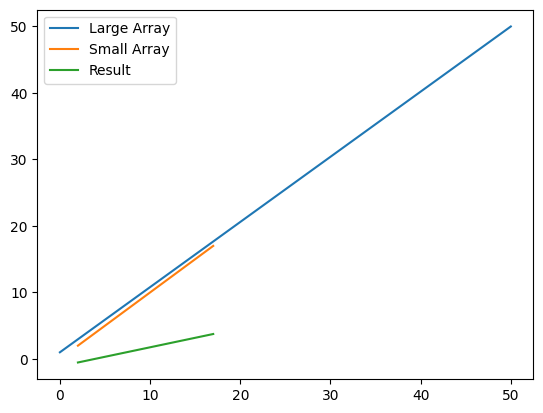

In [25]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0, 50, 65), large_array, label='Large Array')
ax.plot(np.linspace(2, 17, 15), small_array, label='Small Array')
ax.plot(np.linspace(2, 17, 15), result, label='Result')

ax.legend()

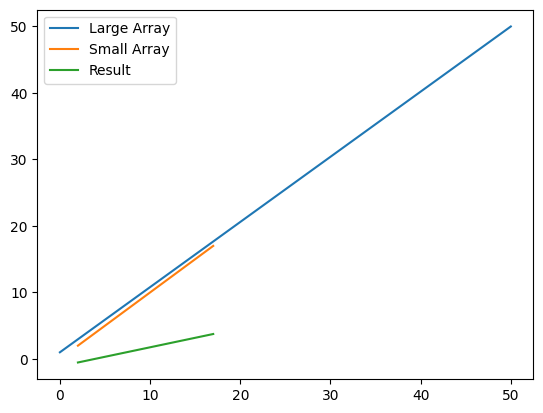

In [32]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0, 50, 65), large_array, label='Large Array')
ax.plot(np.linspace(2, 17, 15), small_array, label='Small Array')
ax.plot(np.linspace(2, 17, 15), result, label='Result')

ax.legend()